In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

### Exponential decay

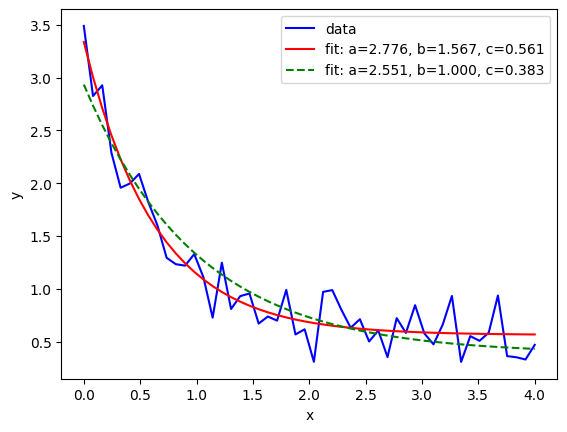

In [26]:
# Define function
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

#Generate noisy data
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
rng = np.random.default_rng()
y_noise = 0.2 * rng.normal(size=xdata.size)
ydata = y + y_noise

#Plot
plt.plot(xdata, ydata, 'b-', label='data')
popt, pcov = curve_fit(func, xdata, ydata)
popt
plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
popt
plt.plot(xdata, func(xdata, *popt), 'g--',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### 2n Order Polynomial

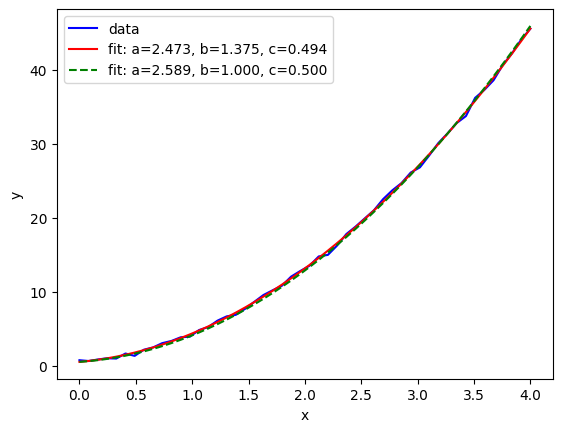

In [29]:
# Define function
def func(x, a, b, c):
    return a * x**2 + b * x + c

#Generate noisy data
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
rng = np.random.default_rng()
y_noise = 0.2 * rng.normal(size=xdata.size)
ydata = y + y_noise

#Plot
plt.plot(xdata, ydata, 'b-', label='data')
popt, pcov = curve_fit(func, xdata, ydata)
popt
plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
popt
plt.plot(xdata, func(xdata, *popt), 'g--',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### 3rd Order Polynomial



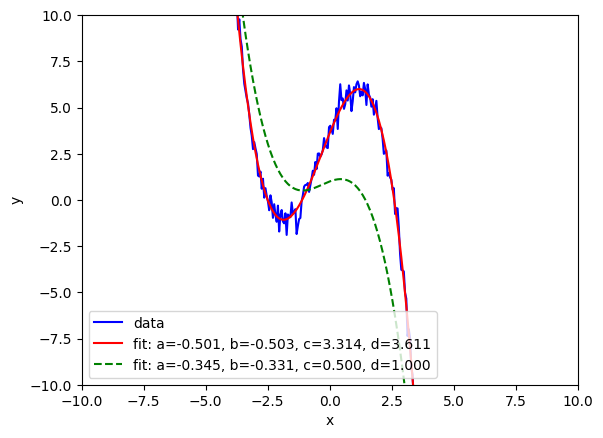

In [74]:
# Define third-order polynomial function
def func(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# Generate noisy data
xdata = np.linspace(-5, 5, 200)
y = func(xdata, -0.5, -0.5, 3.3, 3.6)  # Using arbitrary coefficients for cubic function
rng = np.random.default_rng()
y_noise = 0.5 * rng.normal(size=xdata.size)
ydata = y + y_noise

# Plot the noisy data
plt.plot(xdata, ydata, 'b-', label='data')

# Fit the cubic function to the noisy data
popt, pcov = curve_fit(func, xdata, ydata)
plt.plot(xdata, func(xdata, *popt), 'r-', 
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % tuple(popt))

# Additional fit with bounds on the parameters
popt, pcov = curve_fit(func, xdata, ydata, bounds=([-3., -1., -0.5, -1.], [3., 1., 0.5, 1.]))
plt.plot(xdata, func(xdata, *popt), 'g--', 
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % tuple(popt))

# Set up the plot
plt.axis([-10, 10, -10, 10])
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Circle

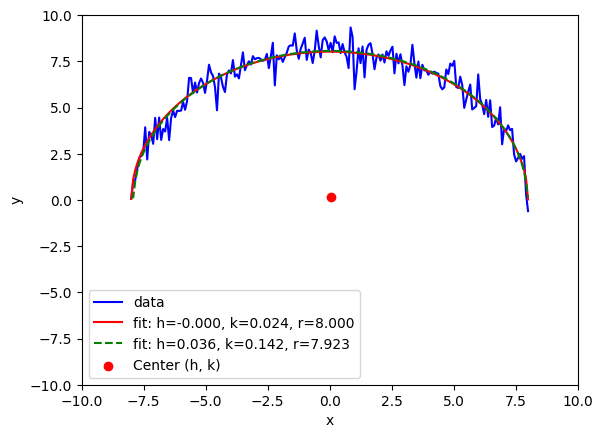

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define circle function
def func(x, h, k, r, upper=True):
    # Ensure no negative values inside the sqrt
    valid = r**2 - (x - h)**2
    valid[valid < 0] = 0  # Set any negative values to zero
    sqrt_term = np.sqrt(valid)
    if upper:
        return k + sqrt_term  # Upper half of the circle
    else:
        return k - sqrt_term  # Lower half of the circle

# Generate noisy data for the upper half of the circle
xdata = np.linspace(-8, 8, 200)  # Restrict xdata to valid range [-r+h, r+h]
h, k, r = 0, 0, 8  # Example circle center (h, k) and radius r
y = func(xdata, h, k, r, upper=True)
rng = np.random.default_rng()
y_noise = 0.5 * rng.normal(size=xdata.size)
ydata = y + y_noise

# Plot the noisy data
plt.plot(xdata, ydata, 'b-', label='data')

# Fit the circle's upper half to the noisy data
# Initial guess for the parameters h, k, r
popt, pcov = curve_fit(lambda x, h, k, r: func(x, h, k, r, upper=True), xdata, ydata, p0=[0, 0, 8])
plt.plot(xdata, func(xdata, *popt, upper=True), 'r-', 
         label='fit: h=%5.3f, k=%5.3f, r=%5.3f' % tuple(popt))

# Additional fit with bounds on the parameters
popt, pcov = curve_fit(lambda x, h, k, r: func(x, h, k, r, upper=True), xdata, ydata, 
                       bounds=([-5., -5., 5.], [5., 5., 10.]))
plt.plot(xdata, func(xdata, *popt, upper=True), 'g--', 
         label='fit: h=%5.3f, k=%5.3f, r=%5.3f' % tuple(popt))

# Plot the center of the circle
plt.scatter(popt[0], popt[1], color='red', label='Center (h, k)')

# Set up the plot
plt.axis([-10, 10, -10, 10])
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


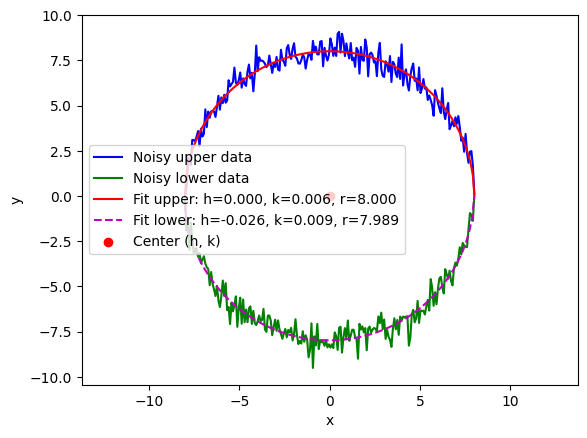

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define circle function
def func(x, h, k, r, upper=True):
    # Ensure no negative values inside the sqrt
    valid = r**2 - (x - h)**2
    valid[valid < 0] = 0  # Set any negative values to zero
    sqrt_term = np.sqrt(valid)
    if upper:
        return k + sqrt_term  # Upper half of the circle
    else:
        return k - sqrt_term  # Lower half of the circle

# Generate noisy data for both halves of the circle
xdata = np.linspace(-8, 8, 200)  # Restrict xdata to valid range [-r+h, r+h]
h, k, r = 0, 0, 8  # Example circle center (h, k) and radius r
y_upper = func(xdata, h, k, r, upper=True)
y_lower = func(xdata, h, k, r, upper=False)
rng = np.random.default_rng()
ydata_upper = y_upper + 0.5 * rng.normal(size=xdata.size)
ydata_lower = y_lower + 0.5 * rng.normal(size=xdata.size)

# Plot the noisy data for both halves
plt.plot(xdata, ydata_upper, 'b-', label='Noisy upper data')
plt.plot(xdata, ydata_lower, 'g-', label='Noisy lower data')

# Fit the circle's upper half to the noisy upper data
popt_upper, _ = curve_fit(lambda x, h, k, r: func(x, h, k, r, upper=True), xdata, ydata_upper, p0=[0, 0, 8])
plt.plot(xdata, func(xdata, *popt_upper, upper=True), 'r-', 
         label='Fit upper: h=%5.3f, k=%5.3f, r=%5.3f' % tuple(popt_upper))

# Fit the circle's lower half to the noisy lower data
popt_lower, _ = curve_fit(lambda x, h, k, r: func(x, h, k, r, upper=False), xdata, ydata_lower, p0=[0, 0, 8])
plt.plot(xdata, func(xdata, *popt_lower, upper=False), 'm--', 
         label='Fit lower: h=%5.3f, k=%5.3f, r=%5.3f' % tuple(popt_lower))

# Plot the center of the circle
plt.scatter(h, k, color='red', label='Center (h, k)')

# Set up the plot
# plt.axis([-10, 10, -10, 10])
plt.axis('equal') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
